In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir("../")
from epitools import get_data

In [2]:
## Peru
gdf_pe = gpd.read_file("https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson")
gdf_pe = gdf_pe.rename(columns={"NOMBDEP": "region"})

df_pe = get_data(
    country="Peru",
    year=2021,
    aggregation="region",
    election="first_round",
    method="nv"
)

data_pe = pd.merge(gdf_pe, df_pe, on="region")

In [35]:
## Chile
gdf_cl = gpd.read_file("geo_shapes/Chile_region.geojson")
gdf_cl = gdf_cl.rename(columns={"codregion": "region_id"})

df_cl = get_data(
    country="Chile",
    year=2021,
    aggregation="region_id",
    election="first_round",
    method="nv"
)
df_cl["region_id"] = df_cl["region_id"].astype(int)

data_cl = pd.merge(gdf_cl, df_cl, on="region_id")

In [18]:
gdf_ar = gpd.read_file("https://raw.githubusercontent.com/deldersveld/topojson/master/countries/argentina/argentina-provinces.json")
gdf_ar = gdf_ar[["ID_1", "NAME_1", "geometry"]].rename(columns={"ID_1": "district_id"})

df_ar = get_data(
    country="Argentina",
    year=2019,
    aggregation="district_id",
    election="first_round",
    method="nv"
)
df_ar["district_id"] = df_ar["district_id"].astype(int)
data_ar = pd.merge(gdf_ar, df_ar, on="district_id")

In [38]:
gdf_br = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/brazil-states.geojson")
gdf_br = gdf_br.rename(columns={"sigla": "region_id"})

df_br = get_data(
    country="Brazil",
    year=2022,
    aggregation="region_id",
    election="first_round",
    method="nv"
)
data_br = pd.merge(gdf_br, df_br, on="region_id")

In [39]:
data = pd.concat([data_pe, data_cl, data_ar, data_br])

C:\Users\cnava\AppData\Roaming\Python\Python310\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


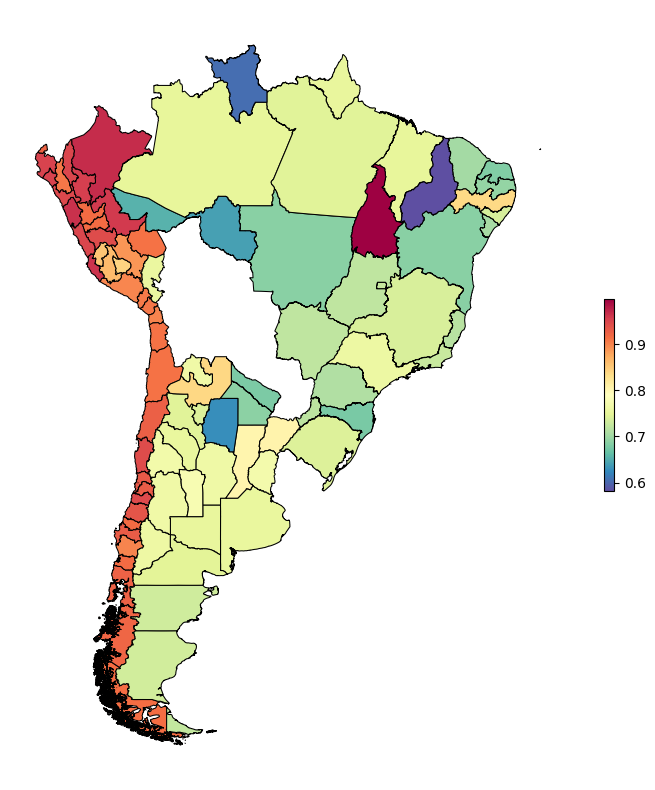

In [43]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

data.plot(
    column="epi",
    edgecolor="black",
    lw=0.75,
    cmap="Spectral_r",
    legend=True, 
    legend_kwds=dict(
        shrink=0.25
    ),
    ax=ax
)

ax.axis("off")
fig.tight_layout()